In [20]:
import sklearn
import matplotlib.pyplot as plt
import numpy as np
from sympy import symbols
import sympy

In [21]:
names = ['Реальные Y',
         'Предсказанные',
         'Реальная функция',
         'Отклоенение Y',
         'Отклоенение Y',
         'Оценка отклонения',
         'Оценка отклонения', ]

In [22]:
class SequantialLearning:
    def __init__(self, F):
        self.cnt = 0
        self.F = F
        self.n = 0
        self.V = 0
        self.v = np.zeros((F.shape[0], 1))
        self.T = np.zeros((F.shape[0], F.shape[0]))

    def _get_F(self, X):
        z = symbols('z')
        res = np.array([])
        for el in self.F:
            if isinstance(el, (int, float)):
                res = np.append(res, el)
                continue
            res = np.append(res, float(el.subs(z, X)))
        res = res[:, np.newaxis]
        res = np.reshape(res, (res.shape[1], res.shape[0]))
        return res

    def fit(self, X, y):
        F_num = self._get_F(X)
        ni = 1
        Vi = np.square(y)
        vi = F_num.T.dot(y)
        Ti = F_num.T.dot(F_num)
        self.n += ni
        self.V += Vi
        self.v += vi
        self.T += Ti
        self.cnt += 1

    def predict(self, x_test):
        F_num = self._get_F(x_test)
        return F_num.dot(np.linalg.inv(self.T)).dot(self.v)

    def get_var(self, x, sigma):
        F_num = self._get_F(x)
        return (
            np.square(sigma) *
            F_num).dot(
            np.linalg.inv(
                self.T)).dot(
                F_num.T)

    def get_var_hat(self, x, sigma):
        F_num = self._get_F(x)
        numerator = self.V - self.v.T.dot(np.linalg.inv(self.T)).dot(self.v)
        denominator = self.cnt - F_num.size
        return numerator / denominator * \
            F_num.dot(np.linalg.inv(self.T)).dot(F_num.T)


In [23]:
def visualise(x, y, y_hat, var_y, var_hat_y, iter_num):
    plt.plot(x, y, 'r.')
    sorted_vals = np.hstack(
        (x[:, np.newaxis], y[:, np.newaxis], y_hat, var_y, var_hat_y))

    sorted_vals = np.array(sorted(sorted_vals, key=lambda x: x[0]))

    x, y, y_hat = sorted_vals[:, 0], sorted_vals[:, 1], sorted_vals[:, 2]
    var_y, var_hat_y = sorted_vals[:, 3], sorted_vals[:, 4]
    plt.plot(x, y_hat, 'b-')

    plt.plot(x, 1 + 2 * x + 0.5 * x ** 3 - 6.58 * x ** 5, 'y-')
    plt.plot(x, y_hat + var_y, 'b--')
    plt.plot(x, y_hat - var_y, 'b--')
    plt.plot(x, y_hat + var_hat_y, 'g--')
    plt.plot(x, y_hat - var_hat_y, 'g--')
    plt.title(f'Аппроксимация функции при {i} точках')
    plt.legend(names)
    plt.show()

In [24]:
np.random.seed(42)
points = [10, 50, 100, 500, 999]
sigma = 10
x = np.linspace(-10, 10, 1000)
np.random.shuffle(x)
y = 1 + 2 * x + 0.5 * x ** 3 - 6.58 * \
    x ** 5 + np.random.randn(x.shape[0]) * sigma
z = symbols('z')
F = np.array([1, z, z**3, z**5])
regr = SequantialLearning(F)
x_to_plot = np.array([])

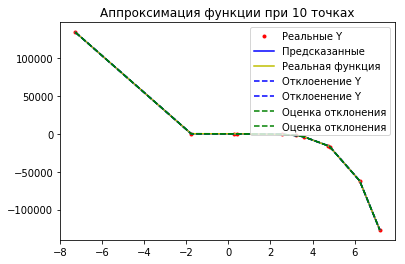

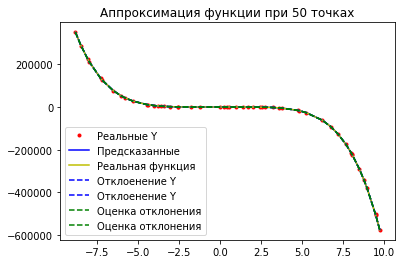

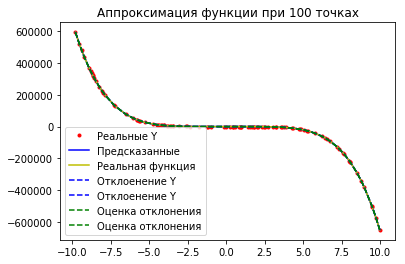

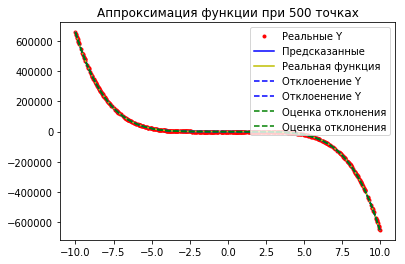

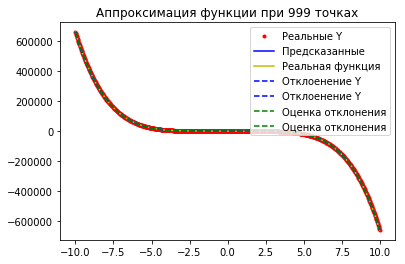

In [25]:
for i in range(len(x)):
    regr.fit(x[i], y[i])
    x_to_plot = np.append(x_to_plot, x[i])
    # print(i)
    if i == points[0]:
        # находим предсказание в каждой точке
        y_hat_to_plot = np.array([regr.predict(el) for el in x_to_plot])
        y_hat_to_plot = np.squeeze(y_hat_to_plot, axis=2)
        # считаем отклонения
        var_y_hat_to_plot = np.array(
            [regr.get_var(el, sigma) for el in x_to_plot])
        var_y_hat_to_plot = np.squeeze(var_y_hat_to_plot, axis=2)

        var_hat_y_hat_to_plot = np.array(
            [regr.get_var_hat(el, sigma) for el in x_to_plot])
        var_hat_y_hat_to_plot = np.squeeze(var_hat_y_hat_to_plot, axis=2)
        # рисуем
        visualise(x_to_plot, y[:i + 1], y_hat_to_plot,
                  var_y_hat_to_plot, var_hat_y_hat_to_plot, i)
        points.pop(0)